[Proedge](http://www.proedgeconsults.com.ng "Visit our website for more information")

<div class="alert alert-block alert-info">
<b>Our Services:</b> 

* We are an ICT Consulting and Training firm. 
* We engage in service deployments and trainings on all scale. 
* We are a phone call away - +2348035859266
</div>

<a id="TOC"></a>
<div class="alert alert-block alert-info">
<b>About this tutorial - Joining Data with Pandas:</b> 
    
<b> Table of Content</b>

* [Chapter 1-  Data Merging Basics](#chapter1)
* [Chapter 2 - Merging Tables With Different Join Types](#chapter2)
* [Chapter 3 - Advanced Merging and Concatenating](#chapter3)
* [Chapter 4 - Merging Ordered and Time-Series Data](#chapter4)
</div>

In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is F6AF-C495

 Directory of C:\pandasjoins

20/10/2022  01:30 pm    <DIR>          .
20/10/2022  01:30 pm    <DIR>          ..
20/10/2022  01:29 pm    <DIR>          .ipynb_checkpoints
20/10/2022  01:30 pm    <DIR>          Datasets
20/10/2022  01:30 pm               589 Joining Data in Pandas.ipynb
               1 File(s)            589 bytes
               4 Dir(s)  104,177,569,792 bytes free


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import os

In [6]:
files = [file for file in os.listdir("./Datasets/")]

for file in files :
    print(file)

actors_movies.csv
business_owners.p
casts.p
census.p
crews.p
cta_calendar.p
cta_ridership.p
financials.p
land_use.p
licenses.p
movies.p
movie_to_genres.p
ratings.p
S&P500.csv
sequels.p
stations.p
taglines.p
taxi_owners.p
taxi_vehicles.p
ward.p
WorldBank_GDP.csv
WorldBank_POP.csv
zip_demo.p


<div class="alert alert-block alert-success">
<b>Hol'Up:</b> The os library helps us accesss local files on our operating system
</div>

<a id="chapter1"></a>
<div class="alert alert-block alert-info">
<b>Chapter 1-  Data Merging Basics:</b> 


* Lesson 1 - Inner Join
* Lesoon 2 - Relationships
* Lesson 3 - Merging Multiple DataFrames


[Back to Table of Content](#TOC)
</div>

## Lesson 1 - Inner Join


### Let us consider two tables for our first merge operation

* Table 1 - Chicago Data Portal Dataset - "ward_offices.csv"
* Table 2 - "ward_census.csv"

In [7]:
wards = pd.read_pickle("Datasets/ward.p")
wards.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [9]:
wards.shape

(50, 4)

In [11]:
wards.columns

Index(['ward', 'alderman', 'address', 'zip'], dtype='object')

In [8]:
census = pd.read_pickle("Datasets/census.p")
census.head()

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [10]:
census.shape

(50, 6)

In [12]:
census.columns

Index(['ward', 'pop_2000', 'pop_2010', 'change', 'address', 'zip'], dtype='object')

<div class="alert alert-block alert-success">
<b>Hol'Up:</b> Both tables are related by the "ward" column which is available in both tables. Thus, we will base our join(merge) operation on that column.

* Here, we will be performing a 1-to-1 relationship, where every row in the left table(wards) must match a corresponding row in the right table(census)

* This type of join is called an "INNER JOIN"

</div>



In [15]:
# Let's go ahead and perform the merge operation

wards_census = wards.merge(census, on="ward")
wards_census.shape

(50, 9)

In [16]:
wards_census.head()

,ward,alderman,address_x,zip_x,pop_2000,pop_2010,change,address_y,zip_y
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637



<div class="alert alert-block alert-success">
<b>Hol'Up:</b> 
Did you notice the automatic suffixes attached to similarly named columns - address and zip? <br>
(1) To differentiate the similiarly named columns in the different tables, pandas as added "_x" to columns in the left table and "_y" to columns in the right table <br>
(2) To change these suffixes to our own specified suffixes do this during the merge
</div>






In [34]:
wards_census = wards.merge(census, on="ward", suffixes=("_ward","_cens"))
wards_census.columns

Index(['ward', 'alderman', 'address_ward', 'zip_ward', 'pop_2000', 'pop_2010',
       'change', 'address_cens', 'zip_cens'],
      dtype='object')

In [19]:
wards_census.head()

,ward,alderman,address_ward,zip_ward,pop_2000,pop_2010,change,address_cens,zip_cens
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [20]:
wards_census.shape

(50, 9)

## Lesson 2 - Relationships


<div class="alert alert-block alert-success">
<b>Relationships:</b> 


* The relationship above is considered a 1-to-1 relationship, because every roow returned must have a matching pair in both tables

* Now, let us look at a more complex relationship - 1-to-many relationship

* In a 1-to-many relationship, 1 row in the left table can be linked to multiple rows in the right table. 
* Let us work with these two(2) tables

    * wards
    * business licenses - licenses.p
</div>


In [21]:
licenses = pd.read_pickle("Datasets/licenses.p")
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [22]:
licenses.shape

(10000, 6)

<div class="alert alert-block alert-success">
<b>Hol'Up:</b> 
    
* Both tables are also related by the "ward" column, so go ahead and do the join(merge) operation
* In this case, every single ward can accommodate multiple businesses, so 1(ward)-to-many(businesses) relationship
</div>



In [25]:

wardlic = wards.merge(licenses, on="ward", suffixes=("_ward","_lic"))
wardlic.head()

,ward,alderman,address_ward,zip_ward,account,aid,business,address_lic,zip_lic
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
1,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
2,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
3,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
4,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622


In [24]:
wardlic.shape

(10000, 9)

## Lesson 3 - Merging Multiple DataFrames

<div class="alert alert-block alert-success">
<b>Merging Multiple DataFrames(Tables):</b> 

* DataFrames to be used are
    * All Business Grants - business_owners.p
    * Licenses
    * Wards
</div>



In [30]:
grants = pd.read_pickle("Datasets/land_use.p")
grants.head()

,ward,residential,commercial,industrial,vacant,other
0,1,41,9,2,2,46
1,2,31,11,6,2,50
2,3,20,5,3,13,59
3,4,22,13,0,7,58
4,5,25,3,1,3,68


<a id="chapter2"></a>
<div class="alert alert-block alert-info">
<b>Chapter 2-  Merging Tables With Different Join Types:</b> 

* Lesson 1 - Left Join
* Lesson 2 - Other Joins
* Lesson 3 - Merging a table to itself - Self Join
* Lesson 4 - Merging on Indexes
    
[Back to Table of Content](#TOC)
</div>



## Lesson 1 - Left Join

<div class="alert alert-block alert-success">
<b>Left Join:</b> 

* A __Left Join__ returns all rows in the left table with only matching rows from the right table
</div>

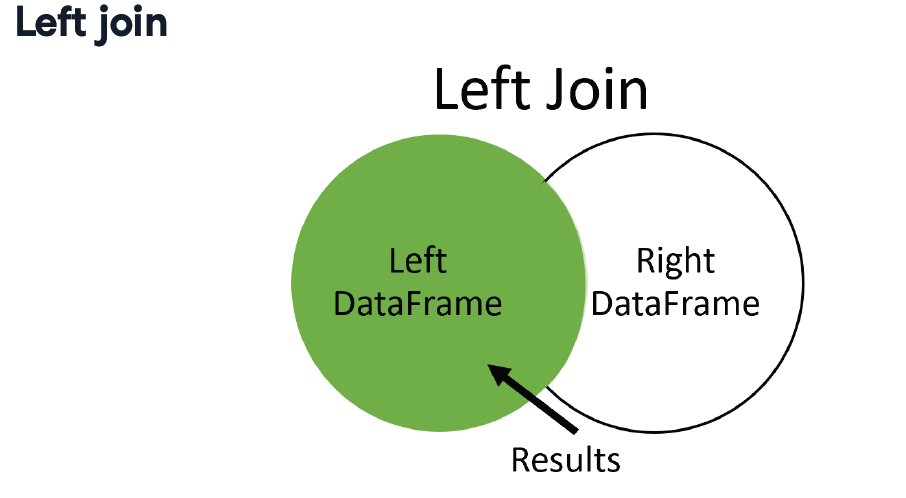

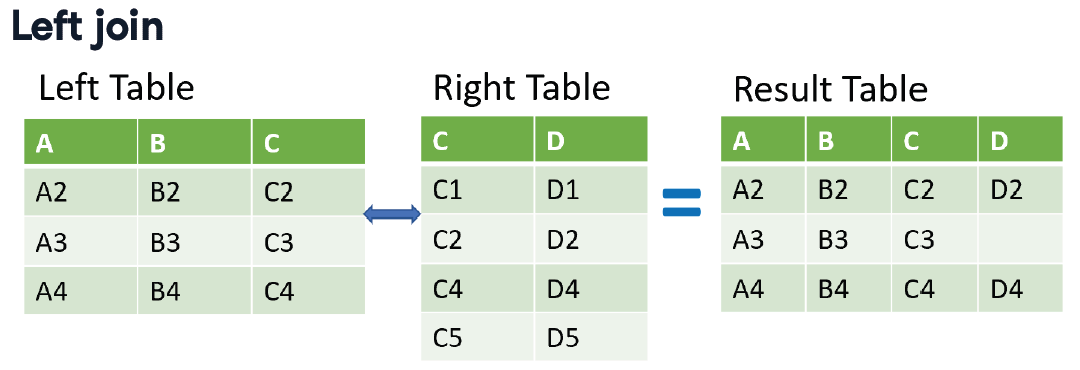

In [42]:
files

['actors_movies.csv',
 'business_owners.p',
 'casts.p',
 'census.p',
 'crews.p',
 'cta_calendar.p',
 'cta_ridership.p',
 'financials.p',
 'land_use.p',
 'licenses.p',
 'movies.p',
 'movie_to_genres.p',
 'ratings.p',
 'S&P500.csv',
 'sequels.p',
 'stations.p',
 'taglines.p',
 'taxi_owners.p',
 'taxi_vehicles.p',
 'ward.p',
 'WorldBank_GDP.csv',
 'WorldBank_POP.csv',
 'zip_demo.p']

<div class="alert alert-block alert-success">
<b>Left Join Demonstration:</b> 
    
We will use the 
- IMDB movie dataset - "movies.p"
- IMDB movie tagline - "taglines.p"    
</div>
 



In [40]:
movies = pd.read_pickle("Datasets/movies.p")
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [41]:
movies.shape

(4803, 4)

In [44]:
taglines = pd.read_pickle("Datasets/taglines.p")
taglines.head()

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


In [45]:
taglines.shape

(3955, 2)

<div class="alert alert-block alert-success">
<b>Merge both DataFrames:</b> 

* Remember this is a left join and the relevant column for joining is __id__
* We will be using the __how__ option, we will set it to __left__
* The default option for __how__ is __inner__, so that's why we didnt use it in our earlier examples
</div>

In [47]:
moviestags = movies.merge(taglines, on="id", how="left")
moviestags.head()

,id,title,popularity,release_date,tagline
0,257,Oliver Twist,20.415572,2005-09-23,NaN
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.
2,38365,Grown Ups,38.864027,2010-06-24,Boys will be boys. . . some longer than others.
3,9672,Infamous,3.680896,2006-11-16,There's more to the story than you know
4,12819,Alpha and Omega,12.300789,2010-09-17,A Pawsome 3D Adventure


In [48]:
moviestags.shape

(4803, 5)

## Lesson 2 - Other Joins

<div class="alert alert-block alert-success">
<b>Other Joins include:</b> Right Join and Outer Join
    
* Right Join - is a mirror opposite of the left join i.e it returns all rows in the right table with matching rows in the left table

* Outer Join - returns all rows in both tables irrespective of matching or non-matching rows

</div>

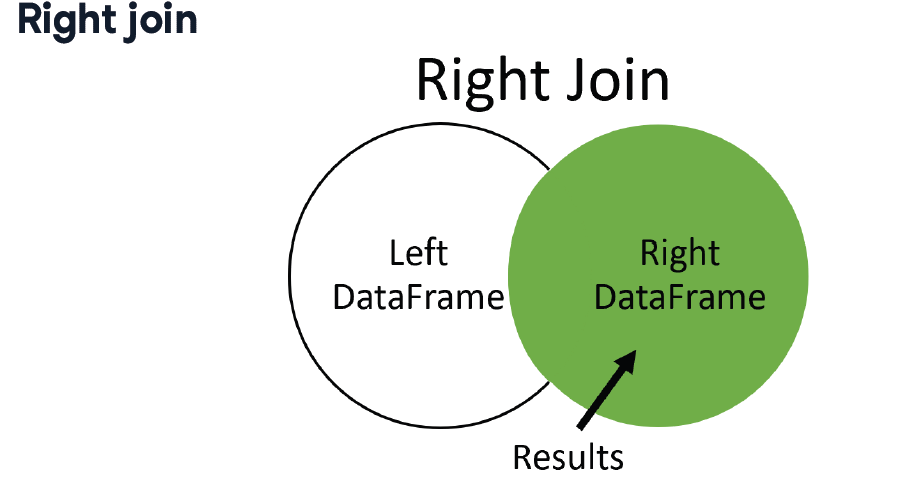

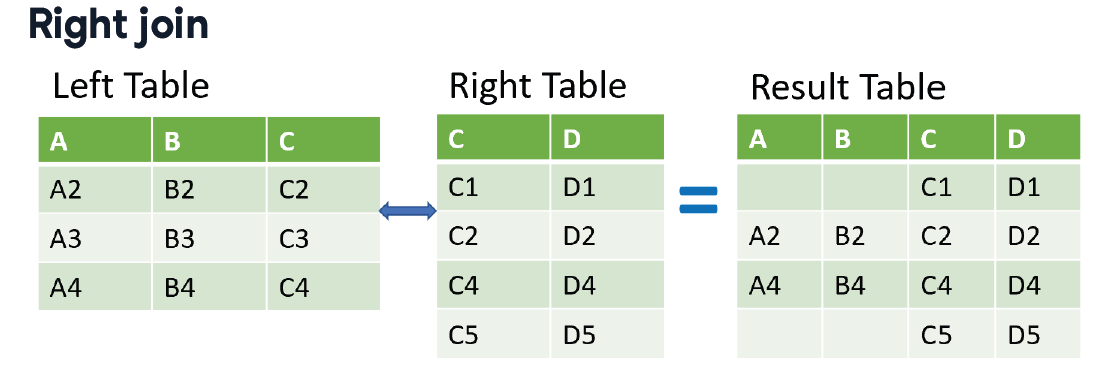

<div class="alert alert-block alert-success">
<b>Right Join Demonstration:</b> 
    
We will use the 
- IMDB movie dataset - "movies.p"
- IMDB movie-to-genre - "movie_to_genres.p"    
</div>
 



In [51]:
moviestogenres = pd.read_pickle("Datasets/movie_to_genres.p")
moviestogenres.head()

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure



<div class="alert alert-block alert-success">
<b>Filtering Data:</b> 

* Let's check for TV Genre from the __moviestogenres__ DataFrame
</div>


In [56]:
# Method 1 - 

tv_genre = moviestogenres[moviestogenres['genre'] == 'TV Movie']
tv_genre.head()

,movie_id,genre
4998,10947,TV Movie
5994,13187,TV Movie
7443,22488,TV Movie
10061,78814,TV Movie
10790,153397,TV Movie


In [58]:
# Method 2
m = moviestogenres['genre'] == 'TV Movie'
tv_genre2 = moviestogenres[m]
tv_genre2

,movie_id,genre
4998,10947,TV Movie
5994,13187,TV Movie
7443,22488,TV Movie
10061,78814,TV Movie
10790,153397,TV Movie
10835,158150,TV Movie
11096,205321,TV Movie
11282,231617,TV Movie


In [57]:
tv_genre.shape

(8, 2)

In [59]:
tv_movies = movies.merge(tv_genre, how='right', left_on='id', right_on='movie_id')
tv_movies.head()

,id,title,popularity,release_date,movie_id,genre
0,10947,High School Musical,16.536374,2006-01-20,10947,TV Movie
1,13187,A Charlie Brown Christmas,8.701183,1965-12-09,13187,TV Movie
2,22488,Love's Abiding Joy,1.128559,2006-10-06,22488,TV Movie
3,78814,We Have Your Husband,0.102003,2011-11-12,78814,TV Movie
4,153397,Restless,0.812776,2012-12-07,153397,TV Movie


<div class="alert alert-block alert-success">
<b>Hol'Up:</b> 

* Did you notice two new keywords:
    - left_on
    - right_on
* Yes, since the two tables common columns do not bear the same name, we have to indicate the names using left_on and right_on respectively
    - So in this case, we want to join both tables using __id__ from the left table(__movies__) and __movie_id__ from the right table(__tv_genre__)
</div>

## Outer Join

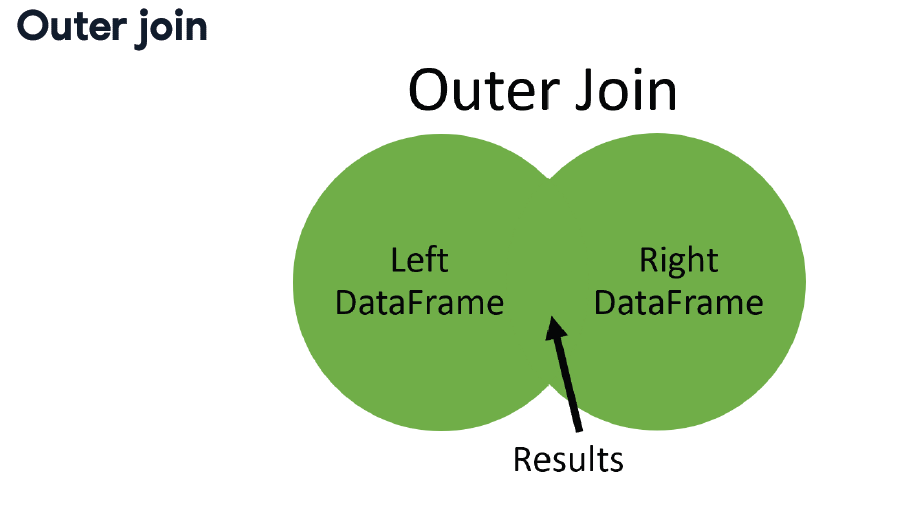

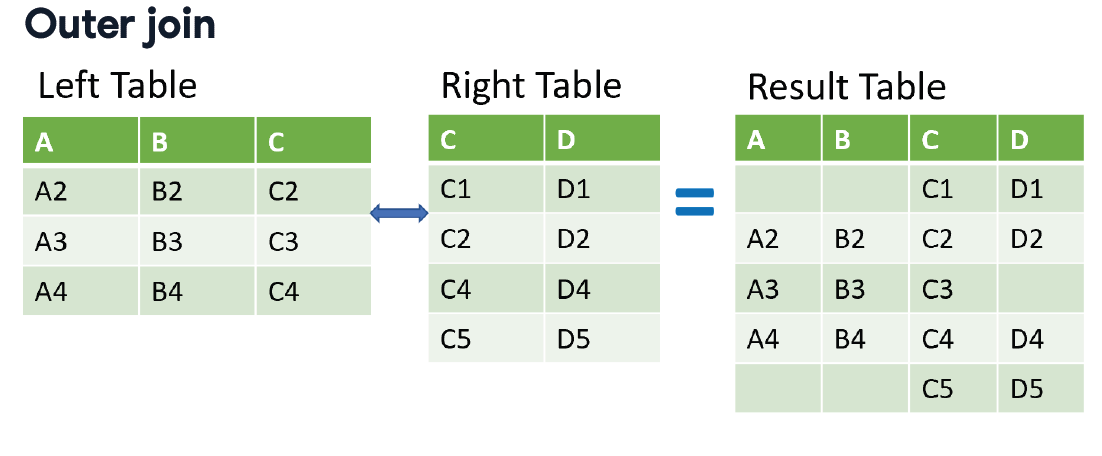

In [60]:
# Datasets for outer join

m1 = moviestogenres['genre'] == 'Family'
family = moviestogenres[m1].head(3)

m2 = moviestogenres['genre'] == 'Comedy'
comedy = moviestogenres[m2].head(3)

In [64]:
family.shape

(3, 2)

In [65]:
family.head()

,movie_id,genre
5,12,Family
33,35,Family
111,105,Family


In [66]:
comedy.shape

(3, 2)

In [67]:
comedy.head()

,movie_id,genre
1,5,Comedy
7,13,Comedy
35,35,Comedy


In [68]:
# Merge with outer join
family_comedy = family.merge(comedy, on='movie_id', how='outer',suffixes=('_fam', '_com'))
family_comedy

,movie_id,genre_fam,genre_com
0,12,Family,NaN
1,35,Family,Comedy
2,105,Family,NaN
3,5,NaN,Comedy
4,13,NaN,Comedy


## Lesson 3 - Merging a table to itself -  Self Join

In [69]:
files

['actors_movies.csv',
 'business_owners.p',
 'casts.p',
 'census.p',
 'crews.p',
 'cta_calendar.p',
 'cta_ridership.p',
 'financials.p',
 'land_use.p',
 'licenses.p',
 'movies.p',
 'movie_to_genres.p',
 'ratings.p',
 'S&P500.csv',
 'sequels.p',
 'stations.p',
 'taglines.p',
 'taxi_owners.p',
 'taxi_vehicles.p',
 'ward.p',
 'WorldBank_GDP.csv',
 'WorldBank_POP.csv',
 'zip_demo.p']

In [72]:
#Sequel movie dataset - "sequels.p"
sequels = pd.read_pickle("Datasets/sequels.p")
sequels.head()

,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863
2,863,Toy Story 2,10193
3,597,Titanic,<NA>
4,24428,The Avengers,<NA>


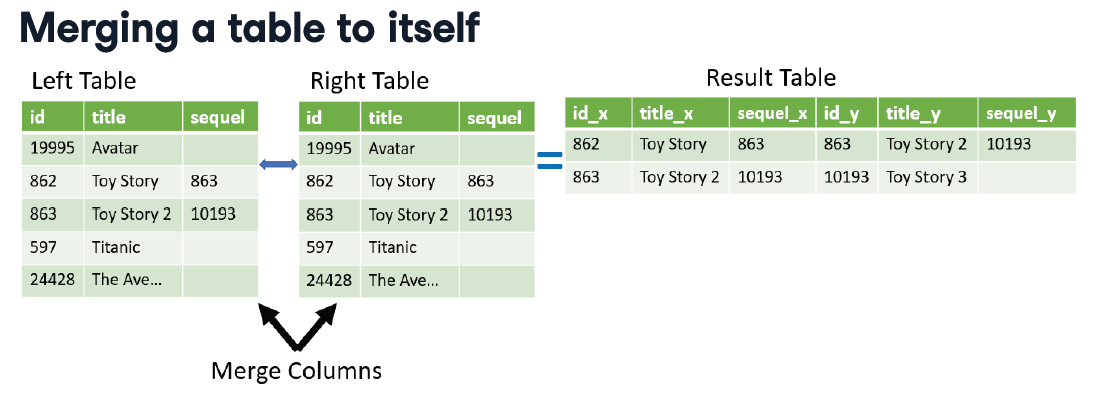

In [73]:
# Merging a table to itself
original_sequels = sequels.merge(sequels, left_on='sequel', right_on='id', suffixes=('_org','_seq'))
original_sequels.head()

,id_org,title_org,sequel_org,id_seq,title_seq,sequel_seq
0,862,Toy Story,863,863,Toy Story 2,10193
1,863,Toy Story 2,10193,10193,Toy Story 3,<NA>
2,675,Harry Potter and the Order of the Phoenix,767,767,Harry Potter and the Half-Blood Prince,<NA>
3,121,The Lord of the Rings: The Two Towers,122,122,The Lord of the Rings: The Return of the King,<NA>
4,120,The Lord of the Rings: The Fellowship of the Ring,121,121,The Lord of the Rings: The Two Towers,122


In [75]:
# Continue format results
original_sequels[['title_org','title_seq']].head()

,title_org,title_seq
0,Toy Story,Toy Story 2
1,Toy Story 2,Toy Story 3
2,Harry Potter and the Order of the Phoenix,Harry Potter and the Half-Blood Prince
3,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Return of the King
4,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers


In [76]:
# Merging a table to itself with left join
original_sequels = sequels.merge(sequels, left_on='sequel', right_on='id', how='left', suffixes=('_org','_seq'))
original_sequels.head()

,id_org,title_org,sequel_org,id_seq,title_seq,sequel_seq
0,19995,Avatar,<NA>,<NA>,NaN,<NA>
1,862,Toy Story,863,863,Toy Story 2,10193
2,863,Toy Story 2,10193,10193,Toy Story 3,<NA>
3,597,Titanic,<NA>,<NA>,NaN,<NA>
4,24428,The Avengers,<NA>,<NA>,NaN,<NA>


<div class="alert alert-block alert-success">
<b>When to merge a table to itself:</b> 

* Common situations:
    - Hierarchical relationships - eg. Employees and Managers
    - Sequential relationships - eg. Logistics Means
    - Graph data - eg. Network of friends - Facebook network of friends etc
</div>



## Lesson 4 - Merging on Indexes

### Setting an index

While loading the movies dataset, you can specify the column you want to use as your index column like this

movies = pd.read_csv('movies.p', index_col=['id'])
movies.head()

In [78]:
movies

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17
...,...,...,...,...
4798,3089,Red River,5.344815,1948-08-26
4799,11934,The Hudsucker Proxy,14.188982,1994-03-11
4800,13807,Exiled,8.486390,2006-09-06
4801,73873,Albert Nobbs,7.802245,2011-12-21


In [80]:
# Since we have already loaded our movies dataset earlier in this tutorial, we can use the set_index() to change our ndex column

movies.set_index("id")

,title,popularity,release_date
id,,,
257,Oliver Twist,20.415572,2005-09-23
14290,Better Luck Tomorrow,3.877036,2002-01-12
38365,Grown Ups,38.864027,2010-06-24
9672,Infamous,3.680896,2006-11-16
12819,Alpha and Omega,12.300789,2010-09-17
...,...,...,...
3089,Red River,5.344815,1948-08-26
11934,The Hudsucker Proxy,14.188982,1994-03-11
13807,Exiled,8.486390,2006-09-06


In [81]:
# Merging on index
movies_taglines = movies.merge(taglines, on='id', how='left')
movies_taglines.head()

,id,title,popularity,release_date,tagline
0,257,Oliver Twist,20.415572,2005-09-23,NaN
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.
2,38365,Grown Ups,38.864027,2010-06-24,Boys will be boys. . . some longer than others.
3,9672,Infamous,3.680896,2006-11-16,There's more to the story than you know
4,12819,Alpha and Omega,12.300789,2010-09-17,A Pawsome 3D Adventure


## Index merge with left_index and right_index

In [83]:
movies_genres = movies.merge(moviestogenres, left_index=True,  right_index=True)
movies_genres.head()

,id,title,popularity,release_date,movie_id,genre
0,257,Oliver Twist,20.415572,2005-09-23,5,Crime
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,5,Comedy
2,38365,Grown Ups,38.864027,2010-06-24,11,Science Fiction
3,9672,Infamous,3.680896,2006-11-16,11,Action
4,12819,Alpha and Omega,12.300789,2010-09-17,11,Adventure


<a id="chapter3"></a>
<div class="alert alert-block alert-info">
<b>Chapter 3-  Advanced Merging and Concatenating:</b> 
     
* Lesson 1 - Filtering Joins
* Lesson 2 - Concatenate DataFrames Vertically
* Lesson 3 - Verifying Integrity
    
[Back to Table of Content](#TOC)
</div>

In [33]:
grants = pd.read_pickle("Datasets/business_owners.p")
grants.head()

,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT


In [27]:
files

['actors_movies.csv',
 'business_owners.p',
 'casts.p',
 'census.p',
 'crews.p',
 'cta_calendar.p',
 'cta_ridership.p',
 'financials.p',
 'land_use.p',
 'licenses.p',
 'movies.p',
 'movie_to_genres.p',
 'ratings.p',
 'S&P500.csv',
 'sequels.p',
 'stations.p',
 'taglines.p',
 'taxi_owners.p',
 'taxi_vehicles.p',
 'ward.p',
 'WorldBank_GDP.csv',
 'WorldBank_POP.csv',
 'zip_demo.p']

<a id="chapter4"></a>
<div class="alert alert-block alert-info">
<b>Chapter 4-  Merging Ordered and Time-Series Data:</b> 

* Lesson 1 - Using merge_ordered()
* Lesson 2 - Using merge_asof()
* Lesson 3 - Selecting Data with .query()
* Lesson 4 - Reshaping data with .melt()

[Back to Table of Content](#TOC)
</div>